<a href="https://colab.research.google.com/github/aleksejalex/PyPEF/blob/main/PyPEF_04_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyPEF, lecture 04. Numerical computations in Python: package NumPy.

Prepared by: Aleksej Gaj ( pythonforstudents24@gmail.com )

🔗 Course website: [https://aleksejalex.4fan.cz/pef_python/](https://aleksejalex.4fan.cz/pef_python/)


In this tutorial we familiarize ourselves with
 - library NumPy: general philosophy, arrays, operations on them, functions


### Solution of the optional homework:
**task:** write a function that will take a list of numbers, test whether list contains numbers only (only type `int` and `float` is applowed) and will return median of those numbers.
  

In [1]:
def calculate_median(numbers:list):
    valid_numbers = []
    for num in numbers:
        if isinstance(num, (int, float)):
            valid_numbers.append(num)

    valid_numbers.sort()
    length = len(valid_numbers)

    if length == 0:
        return None
    elif length % 2 == 0:
        middle = length // 2
        return (valid_numbers[middle - 1] + valid_numbers[middle]) / 2
    else:
        return valid_numbers[length // 2]

# Example usage:
number_list = [1, 2.5, 3, 4, 5, 1000, 2000]
#number_list = [1, 2, 3, 4]
median = calculate_median(number_list)
print("Median:", median)


Median: 4


## Optional homework (new):
*task:* write a function `gauss()` that will return a value of Gaussian probability distribution function.
Make mean value $\mu$ (`mu`) and dispersion $\sigma$ (`sigma`) optional arguments.

Hint/reminder:
$$
    y = \frac{1}{\sqrt{2 \pi \sigma^2} } e^{- \frac{(x - \mu)^2}{2 \sigma^2}}
$$

Default values: $\mu = 0$, $\sigma = 1$.

(more on gaussian curve >> [here](https://en.wikipedia.org/wiki/Normal_distribution))

In [ ]:
def gauss():
    pass

x = 1
y = gauss(x)
y = gauss(x, mu=2, sigma=0.2)

### Inheritance.



In [3]:
# next time

## Recall: containers.
Python uses several containers:
 - list


| Type         | Description                                | Example                   |
|--------------|--------------------------------------------|---------------------------|
| list         | Ordered collection of items                | `my_list = [1, 2, 3]`     |
| tuple        | Immutable ordered collection of items      | `my_tuple = (1, 2, 3)`    |
| set          | Unordered collection of unique items       | `my_set = {1, 2, 3}`      |
| dict         | Collection of key-value pairs              | `my_dict = {'eggs': 6, 'apples': 3, 'cookies': "chocolate"}`|


## Technical recall 1: printing objects

In [1]:
class Cat:
    def __init__(self, weight = 10):
        self.weight = weight

    def __repr__(self):
        # string representation of the object
        # this fction is called when object is called in ipython (just variable in notebook)
        return f'Just a cat with weight of {self.weight} kg'

    def __str__(self):
        # string representation of object's value
        # this fction is called when object is being printed
        return f'This cat was printed, meow 🐾'

In [2]:
my_cat = Cat()

In [3]:
my_cat

Just a cat with weight of 10 kg

In [4]:
print(my_cat)

This cat was printed, meow 🐾


## Technical recall 2: how to import packages and how to use them

In [5]:
# keyword of interactive python (iPython), which runs .ipynb notebooks
%whos

Variable   Type    Data/Info
----------------------------
Cat        type    <class '__main__.Cat'>
my_cat     Cat     This cat was printed, meow 🐾


3 ways how to import in Python:

In [6]:
# 1. directly (usually ineficient)
import math

In [7]:
%whos

Variable   Type      Data/Info
------------------------------
Cat        type      <class '__main__.Cat'>
math       module    <module 'math' (built-in)>
my_cat     Cat       This cat was printed, meow 🐾


✨ We see there `math` as object of type `module`.

In [8]:
math.cos(2 * math.pi)

1.0

In [9]:
# 2. via reference (most common, highly recomended)
import math as mt

In [10]:
mt.cos(2 * mt.pi)

1.0

In [11]:
# 3. selectively (good in cases, when you need only one/two objects from the library)
from math import cos, pi

In [12]:
cos(2*pi)

1.0

In [13]:
# 4. everything from library (NOT recomended, unless you import something small or you really need all objects inside)
from math import *

In [14]:
%whos

Variable    Type                          Data/Info
---------------------------------------------------
Cat         type                          <class '__main__.Cat'>
acos        builtin_function_or_method    <built-in function acos>
acosh       builtin_function_or_method    <built-in function acosh>
asin        builtin_function_or_method    <built-in function asin>
asinh       builtin_function_or_method    <built-in function asinh>
atan        builtin_function_or_method    <built-in function atan>
atan2       builtin_function_or_method    <built-in function atan2>
atanh       builtin_function_or_method    <built-in function atanh>
ceil        builtin_function_or_method    <built-in function ceil>
comb        builtin_function_or_method    <built-in function comb>
copysign    builtin_function_or_method    <built-in function copysign>
cos         builtin_function_or_method    <built-in function cos>
cosh        builtin_function_or_method    <built-in function cosh>
degrees     builtin_

## NumPy: Numerical Python

<img src="https://numpy.org/doc/stable/_static/numpylogo.svg" alt="logo" width="400">

[documentation](https://numpy.org/)

= library created to work with *numerical data*:

 - effectively stores and operates with high-dimensional data structures (**arrays** - like vectors and matrices)
 - implements mathematical operations on those arrays

In [15]:
# import
import numpy as np

### Array - basic type of variable in NumPy

 - very similar to vector/matrix in algebra
 - type of variable: `ndarray`

| Feature                          | Python Lists (`list`)                                 | NumPy Arrays (`ndarray`)                                 |
|----------------------------------|-----------------------------------------------|----------------------------------------------|
| Data Types                       | Can contain elements of different data types  | Homogeneous data type ⚠️                       |
| Performance                      | Slower for large datasets                     | Faster for large datasets                    |
| Mathematical Operations          | Limited functionality for mathematical ops    | Rich set of mathematical operations         |
| Indexing and Slicing             | Basic indexing and slicing                    | Advanced indexing and slicing                |
| Iteration                        | Basic iteration                                | Vectorized operations                        |
| Memory Efficiency                | Less memory efficient                         | More memory efficient                        |


Example:

$$ \vec{v} = \begin{pmatrix} 1 \\ 2 \\ 3 \\ 4 \end{pmatrix} $$

In [16]:
v = np.array([1,2,3,4])

v

array([1, 2, 3, 4])

In [17]:
print(v)

[1 2 3 4]


In [18]:
type(v)

numpy.ndarray

NumPy's array can be created:
 - from Python container - like `list` or `tuple`
 - via some NumPy function (for example `np.zeros`)
 - by loading from file



In [19]:
mylist = [1,2,3]   # Python's "native" list
arr_from_list = np.array(mylist)

print(arr_from_list)
print(mylist)

[1 2 3]
[1, 2, 3]


🗒️ Note: `list` is printed with commas while `np.array` is printed without them.

2-D array (matrix):

$$
\mathbb{A} = \begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
\end{pmatrix} $$

In [20]:
A = np.array([[1,2,3], [4,5,6], [7,8,9]])

A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Matrix transposition:

In [21]:
A.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

Shape of array, size of array

 - shape ... number of elements in each dimension
 - size ... total number of elements in the array

In [22]:
v.shape

(4,)

In [23]:
A.shape

(3, 3)

In [24]:
v.size

4

In [25]:
A.size

9

`ndarray` must have all its elements of the same type. Type can be checked via `dtype` method:

In [26]:
A.dtype

dtype('int64')

Type of elements of a `ndarray` can be set when creating the object:

In [27]:
B = np.array([[1, 2], [101, 102]], dtype='int')

B

array([[  1,   2],
       [101, 102]])

Possible options are: `int`, `float`, `complex`, `bool`, `object`.

### Array-generating functions
 = functions that will automatically create an array, so we don't have to specify its elements manually

In [28]:
x = np.arange(start=0, stop=10, step=1)

x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [29]:
x = np.arange(start=-1, stop=1, step=0.1)

x

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

In [30]:
zero_mtx = np.zeros([2,3])

zero_mtx

array([[0., 0., 0.],
       [0., 0., 0.]])

In [31]:
ones_mtx = np.ones([3,2])

ones_mtx

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [32]:
eye_mtx = np.eye(5, dtype = int)

eye_mtx

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

In [33]:
eye_mtx.dtype

dtype('int64')

In [34]:
# Array of random numbers - each is generated from uniform distribution on (0,1)
np.random.rand(3,4)

array([[0.73983493, 0.59461434, 0.47582717, 0.35996216],
       [0.89911596, 0.04914441, 0.92474063, 0.69118869],
       [0.69992599, 0.27469835, 0.89315862, 0.43586586]])

In [35]:
# Array of random numbers - each is generated from Gaussian curve on (0,1)
np.random.randn(3,4)

array([[-0.67227004,  0.41555384,  0.32553833,  1.00838331],
       [-0.36487522,  0.7603918 , -0.21876774,  0.70213938],
       [ 0.28934602, -0.71686377,  0.87642095, -1.265856  ]])

Just a visualisation - what's the difference:

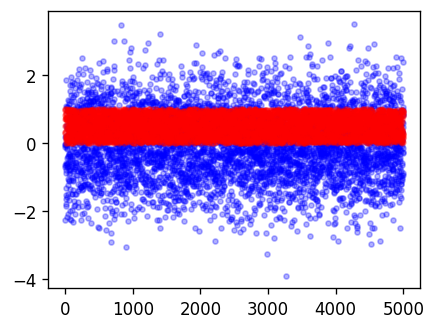

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3), dpi=120)
plt.plot(np.random.randn(5000), 'b.', alpha = 0.3)
plt.plot(np.random.rand(5000), 'r.', alpha=0.3)
plt.show()

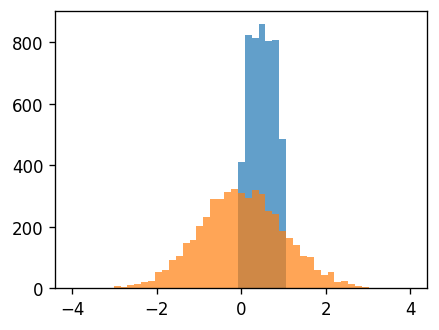

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3), dpi=120)
plt.hist(np.random.rand(5000), bins=np.linspace(-4, 4, 50), alpha=0.7)  # Set alpha to 0.5 for transparency
plt.hist(np.random.randn(5000), bins=np.linspace(-4, 4, 50), alpha=0.7)  # Set alpha to 0.5 for transparency
plt.show()


(We will learn plotting figures next time.)

In [38]:
# reminder: array with random integers
np.random.randint(0, 10, size=(3, 3))

array([[5, 9, 6],
       [0, 2, 9],
       [6, 2, 2]])

### Array arithmetics

Let's have these two matrices:

$$ \mathbb{A} =
\begin{pmatrix}
1 & 2 \\
3 & 4 \\
\end{pmatrix} ,
\quad \quad
\mathbb{B} =
\begin{pmatrix}
5 & 6 \\
7 & 8 \\
\end{pmatrix}
$$



In [39]:
A = np.array([[1, 2],[3, 4]])
B = np.array([[5, 6],[7, 8]])

In [40]:
# sum of those matrices:
A+B

array([[ 6,  8],
       [10, 12]])

In [41]:
A-B

array([[-4, -4],
       [-4, -4]])

In [42]:
# dot product (cz. maticové násobení)
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [43]:
# or equivalently:
A @ B

array([[19, 22],
       [43, 50]])

You can test it by hand 😜:

$$
\mathbb{A} \cdot \mathbb{B} =
\begin{pmatrix}
1 & 2 \\
3 & 4 \\
\end{pmatrix}
\cdot
\begin{pmatrix}
5 & 6 \\
7 & 8 \\
\end{pmatrix}
=
\begin{pmatrix}
19 & 22 \\
43 & 50 \\
\end{pmatrix}
$$

In [44]:
# element-wise product (cz. násobení po prvcích)
np.multiply(A, B)

array([[ 5, 12],
       [21, 32]])

In [45]:
# or equivalently:
A * B

array([[ 5, 12],
       [21, 32]])

### Intermezzo: speed comparison (proof that it makes sense to use NumPy)

NumPy is much better optimized (in sense of speed of computation). Here I demonstrate it:

 - below is function `my_dot_product` which multiplies two `list`s (not `ndarray`s)
 - then it's called with two anonymous lists with randomly generated numbers

Time measurement is performed in jupyter notebook via "magic command" `%timeit`.

In [46]:
def my_dot_product(list1, list2):
    result = 0
    for i in range(len(list1)):
        result = result + list1[i] * list2[i]

    return result

1. let's measure how quick this function computes:

In [47]:
%timeit my_dot_product(list(np.random.randint(0, 10, size=(10000,1))), list(np.random.randint(0, 10, size=(10000,1))))

19.8 ms ± 4.39 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


2. now let's perform the same multiplication via native functionality in NumPy:

In [48]:
%timeit np.random.randint(0, 10, size=(10000,1)).T @ np.random.randint(0, 10, size=(10000,1))

364 µs ± 4.46 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


The difference is obvious 😉

In [50]:
19800 / 360

55.0

### Working with array
~ quite similar to lists

In [51]:
matrix = np.array([[1, 2], [3, 4]], dtype=int)
matrix

array([[1, 2],
       [3, 4]])

Access to elements:

In [52]:
matrix[1, 1]

4

Rewriting elements:

In [53]:
matrix[1, 1] = 100
matrix

array([[  1,   2],
       [  3, 100]])

Rewriting whole column/row:

In [54]:
matrix[1,:] = -1
matrix

array([[ 1,  2],
       [-1, -1]])

From n-D array to 1-D array ("flattening matrices into long vectors"):

In [55]:
matrix.flatten()

array([ 1,  2, -1, -1])

Slicing: allows you to access a portion of an array
> `array[start:end:step]`

In [57]:
arr = np.array([1, 2, 3, 4, 5])
arr[1:4]

array([2, 3, 4])

In [58]:
arr = np.array([[1, 2, 3], [4, 5, 6]])
reshaped_arr = np.reshape(arr, (3, 2))
reshaped_arr

array([[1, 2],
       [3, 4],
       [5, 6]])

Concatenation of `ndarray`s:

In [59]:
C = np.concatenate([A, B], axis=0)
C

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [60]:
D = np.concatenate([A, B], axis=1)
D

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

### Mathematical functions

NumPy provides wide range of mathematical functions which can be applied on `int` or `float` and also on `ndarray`. They act on `ndarray` *element-wise*.

*Examples:*

#### Trigonometric functions:

In [61]:
arr = np.array([0, np.pi*2, np.pi])
print("arr = ", arr)

# Sine function
sine_values = np.sin(arr)
print("Sine:", sine_values)

# Cosine function
cosine_values = np.cos(arr)
print("Cosine:", cosine_values)

# Tangent function
tangent_values = np.tan(arr)
print("Tangent:", tangent_values)

arr =  [0.         6.28318531 3.14159265]
Sine: [ 0.0000000e+00 -2.4492936e-16  1.2246468e-16]
Cosine: [ 1.  1. -1.]
Tangent: [ 0.0000000e+00 -2.4492936e-16 -1.2246468e-16]


#### Exponential and different logarithms:

In [62]:
arr = np.array([1, 2, 3])

# Exponential function (e^x)
exp_values = np.exp(arr)
print("Exponential:", exp_values)

# Natural logarithm (base e)
log_values = np.log(arr)
print("Natural Logarithm:", log_values)

# Common logarithm (base 10)
log10_values = np.log10(arr)
print("Common Logarithm:", log10_values)

# Logarithm of base 2
log2_values = np.log2(arr)
print("Base 2 Logarithm:", log2_values)

Exponential: [ 2.71828183  7.3890561  20.08553692]
Natural Logarithm: [0.         0.69314718 1.09861229]
Common Logarithm: [0.         0.30103    0.47712125]
Base 2 Logarithm: [0.        1.        1.5849625]


#### Basic statistical functions:

In [63]:
arr = np.array([1, 2, 3, 4, 5])

# Mean
mean_value = np.mean(arr)
print("Mean:", mean_value)

# Median
median_value = np.median(arr)
print("Median:", median_value)

# Standard deviation
std_value = np.std(arr)
print("Standard Deviation:", std_value)

# Variance
var_value = np.var(arr)
print("Variance:", var_value)

# Minimum value
min_value = np.min(arr)
print("Minimum Value:", min_value)

# Maximum value
max_value = np.max(arr)
print("Maximum Value:", max_value)


Mean: 3.0
Median: 3.0
Standard Deviation: 1.4142135623730951
Variance: 2.0
Minimum Value: 1
Maximum Value: 5


## What was omitted?

 - reading an array from text file --> next time
 - plotting values --> next time (different package)
 - special functions for linear algebra: Fast Fourier Transform, LU decomposition, SVD decomposition, ....
 - ....


 some [tutorials on NumPy](https://numpy.org/numpy-tutorials/index.html)


😵‍💫 If you are a little lost, don't worry : next time we start plotting graphs, so we will need to work with NumPy arrays and some functions -> we will see these things one more time **in practice**.

## Optional homework:

*task:* write a function, that will take a matrix, and:
 - check if the matrix is square
 - if it's square, return its determinant (`np.det(A)`)
 - if it's *not* rectangular, reshape it so it's square and then return its determinant
 - if reshaping is not possible (odd number of elements), fill it with ones

(use library NumPy)